# Facial Image Classification

In [1]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# import the face dataset
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

# print a description of the dataset
print(olivetti.DESCR)

# assign the numpy array of face data to a variable 'x'
x = olivetti.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Administrator\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with toler

In [15]:
x.shape

# The images are of 40 subjects each taken a total lof 10 pictures building a sample of 400 images of 64 * 64 pixels.

(400, 4096)

## Visualize the first face by executing the following

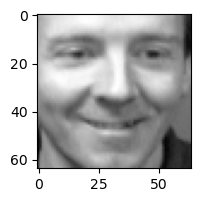

In [13]:
# Extracting the one image and reshaping it
Img = x[20].reshape(64,64)

# Plotting image
fig = plt.figure(figsize=(2,2))
plt.imshow(Img,
           cmap='gray')

## Dimensionality Reduction (PCA)

In [30]:
# Using PCA to create a new numpy array from `x` that contains the principal component values containing 95% of the variance from the original data.

# Using PCA to retain 95% of the variance
pca_faces = PCA(n_components=0.95)
x_reduced = pca_faces.fit_transform(x)

print(x_reduced.shape)

# Reduction Factor
x.shape[1]/x_reduced.shape[1] 

(400, 123)


33.300813008130085

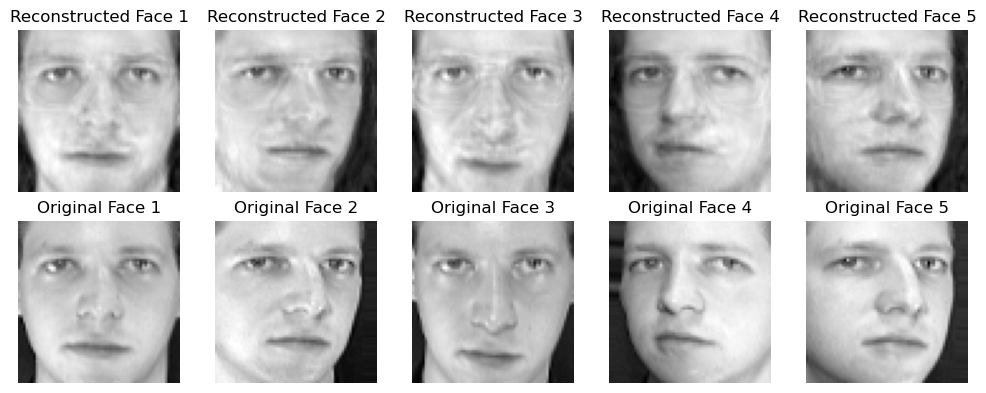

In [31]:
# Inverse transform the reduced data to get approximated original data
x_reconstructed = pca_faces.inverse_transform(x_reduced)

# Plotting 5 faces from the reconstructed data
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes[0]):
    ax.imshow(x_reconstructed[i].reshape(64, 64), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Reconstructed Face {i+1}")

# Plotting the corresponding 5 faces from the original data
for i, ax in enumerate(axes[1]):
    ax.imshow(x[i].reshape(64, 64), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Original Face {i+1}")

plt.tight_layout()
plt.show()

For 50.0% variance:
Number of principal components: 4
Reduction factor: 1024.00


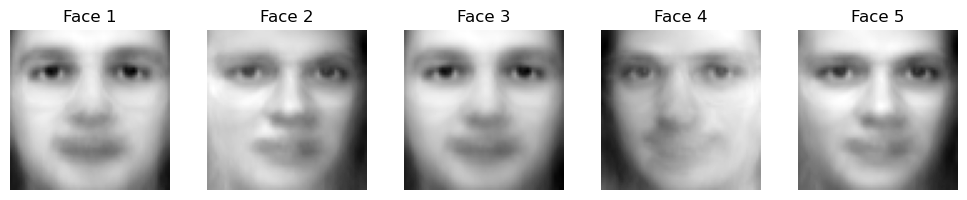

For 75.0% variance:
Number of principal components: 19
Reduction factor: 215.58


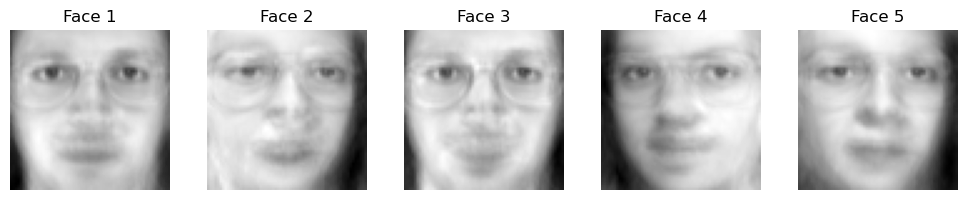

For 99.0% variance:
Number of principal components: 260
Reduction factor: 15.75


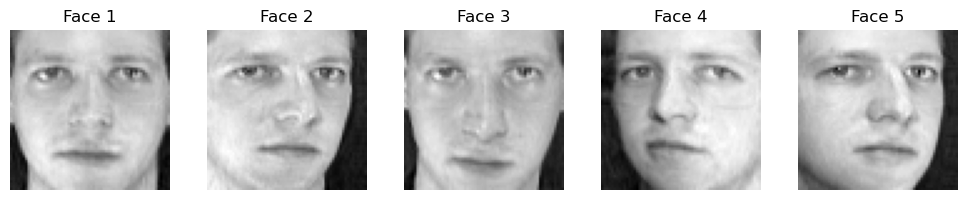

In [35]:
# List of variance retentions to consider
variances = [0.50, 0.75, 0.99]

# Original number of features
original_features = x.shape[1]

# Looping through each variance value
for variance in variances:
    # PCA transformation
    pca = PCA(n_components=variance)
    x_reduced = pca.fit_transform(x)
    
    # Inverse transform to get approximated original data
    x_reconstructed = pca.inverse_transform(x_reduced)
    
    # Print the number of principal components retained and the reduction factor
    num_principal_components = x_reduced.shape[1]
    reduction_factor = original_features / num_principal_components
    print(f"For {variance*100}% variance:")
    print(f"Number of principal components: {num_principal_components}")
    print(f"Reduction factor: {reduction_factor:.2f}")
    print("="*40)
    
    # Plotting 5 faces from the reconstructed data
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(x_reconstructed[i].reshape(64, 64), cmap='gray')
        ax.axis('off')
        ax.set_title(f"Face {i+1}")
    plt.tight_layout()
    plt.show()

- At 50% variance only the most prominent features of the face are retained, such as the general face shape, eyes, nose, and mouth locations. However, finer details like skin texture, subtle facial expressions, and other nuances are lost.
- At 75% variance more facial details are retained compared to 50% variance. You'll be able to recognize more facial features, but some subtle details are missing.
- At 99% variance the images look quite close to the original ones. Most of the facial features are noticeable, and only very subtle details is missing.

## Classification

In [38]:
# Initialize K-Means clustering with 80 clusters
kmeans = KMeans(n_clusters=80, random_state=42, n_init=10)

# Fit the model to the PCA-transformed data
kmeans_clusters = kmeans.fit_predict(x_reduced)

# Getting the cluster assignments for the first 5 faces
clusters_for_5_faces = kmeans_clusters[:5]
print(clusters_for_5_faces)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[21 11 21 12 57]


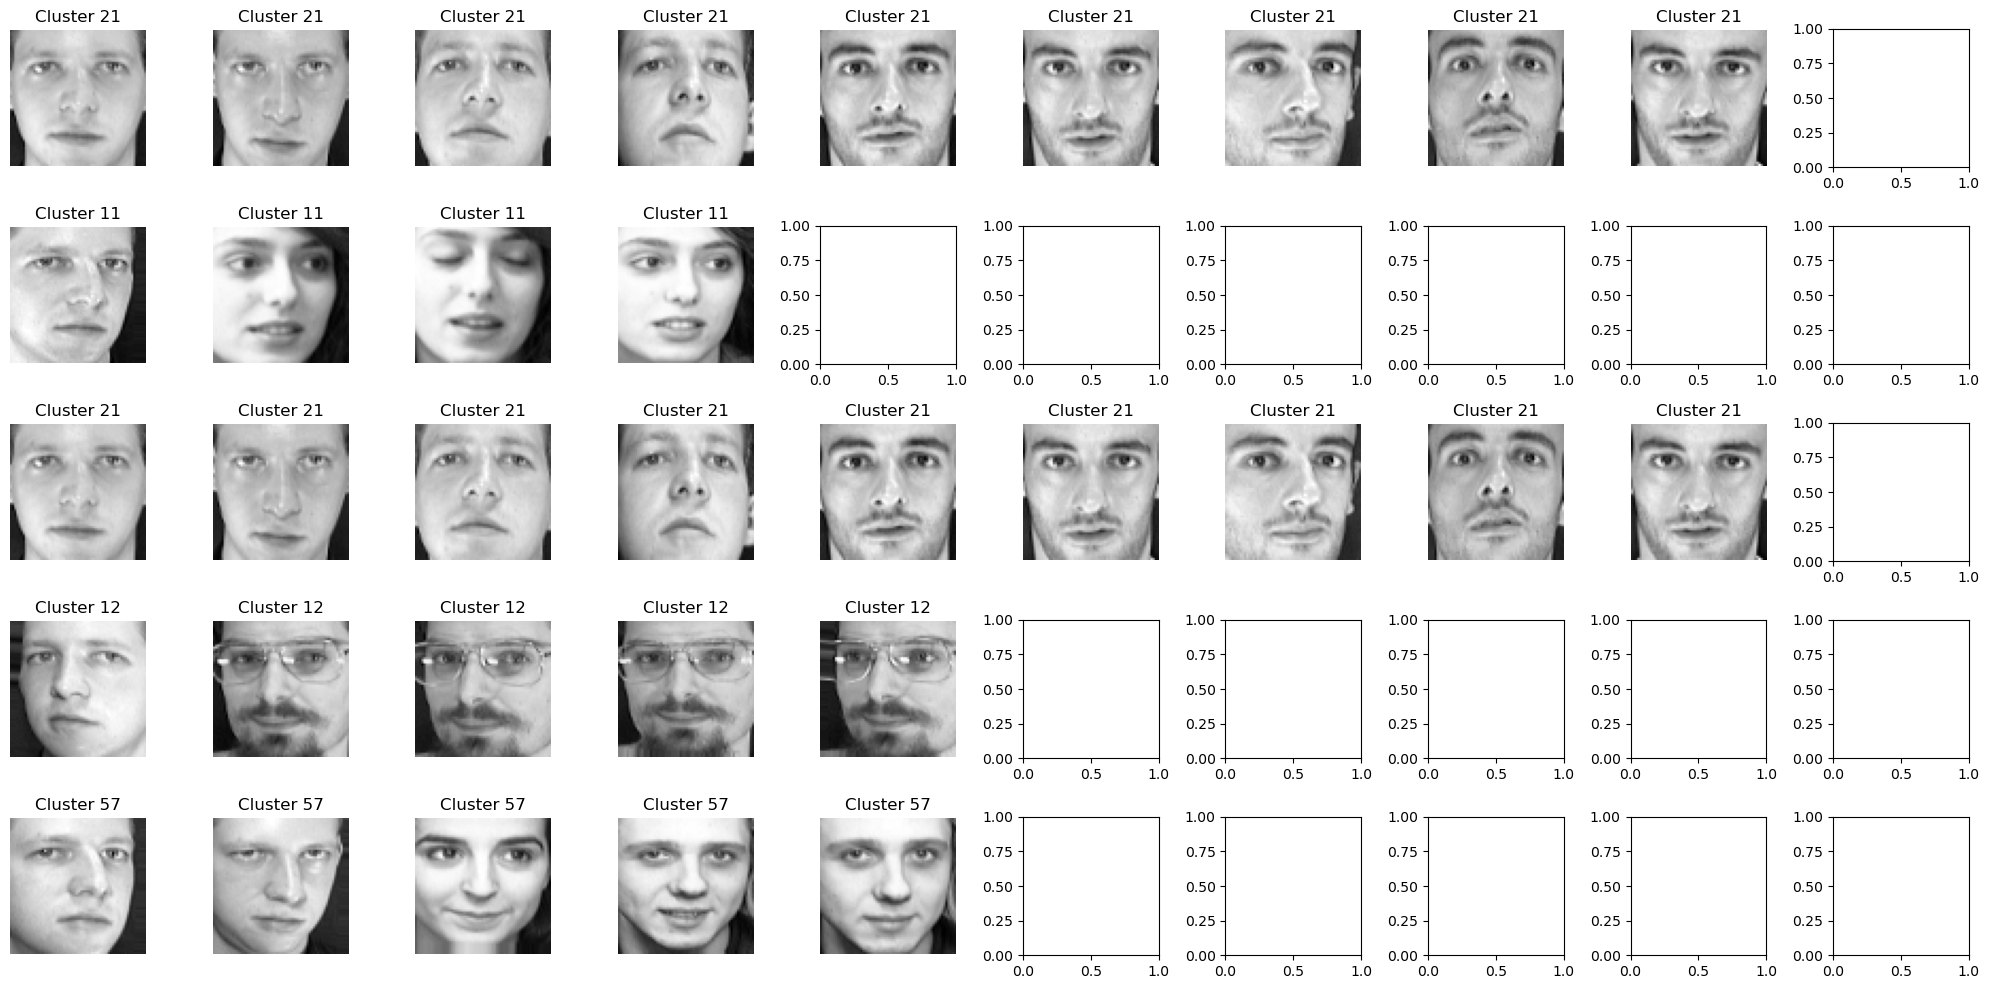

In [39]:
# For each of your 5 faces, plot the other faces that are in the same cluster.
import numpy as np

fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # Assuming at most 10 faces per cluster for visualization

for idx, cluster_val in enumerate(clusters_for_5_faces):
    # Getting indices of all faces in the cluster of the current face
    faces_in_cluster = np.where(kmeans_clusters == cluster_val)[0]
    
    # Plotting the faces in the cluster
    for j, face_idx in enumerate(faces_in_cluster):
        # Break after plotting 10 faces for visualization purposes
        if j >= 10:
            break
        axes[idx, j].imshow(x[face_idx].reshape(64, 64), cmap='gray')
        axes[idx, j].axis('off')
        axes[idx, j].set_title(f"Cluster {cluster_val}")

plt.tight_layout()
plt.show()

In [41]:
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
import requests
from io import BytesIO
from PIL import Image

# Downloading the image using requests
response = requests.get('https://raw.githubusercontent.com/benjum/UCLAX-23Summer-ML-Data/main/Ben1.jpg')
image_data = BytesIO(response.content)

# Opening the image using PIL
image = Image.open(image_data)

image_gray = image.convert("L")

# Resizing the image to 64x64
image_resized = image_gray.resize((64, 64))

# Convert the image data to numpy array
im_array = np.array(image_resized).astype('float32')

# Normalizing the image data
im_normalized = im_array / 255.0

# Plotting the processed image
plt.figure(figsize=(2,2))
plt.imshow(im_normalized, cmap='gray')
plt.axis('off')
plt.show()


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000230A6AE19E0>

In [ ]:
# Transform the new picture into the PCA space
im_transformed = pca_faces.transform(im_normalized.reshape(1, -1))

# Predict the cluster of the new picture using the KMeans model
predicted_cluster = kmeans.predict(im_transformed)

# Identify and plot the other faces in the predicted cluster
faces_in_predicted_cluster = np.where(kmeans_clusters == predicted_cluster[0])[0]

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, face_idx in enumerate(faces_in_predicted_cluster):
    if i >= 10:  # Limiting to 10 faces for visualization
        break
    axes[i].imshow(x[face_idx].reshape(64, 64), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Face {i+1}")

plt.tight_layout()
plt.show()